<a href="https://colab.research.google.com/github/30225/30225/blob/main/computer_vision_exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision Exam #2

Fernando Quintero    
Universidad Tecnológica de Bolívar    

This is the second exam of the computer vision course in Universidad Tecnológica de Bolívar. The exam consists of two exercises:

- Connected components and morphological operations
- Filters in Fourier spectrum

Each exercise is weighted equally, with 2.5 points assigned to each, contributing to a total of 5 points for this part of the exam. Please ensure that you carefully read and address all questions.

Good luck!

In [ ]:
# Please fill in these lines with your student information
# Name: Angelo David Diaz Lopez
# Code: T00061141

### Import libraries

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import urllib.request

## Exercise 1 (connected components and morphological operations)


Upload a picture of rice grains

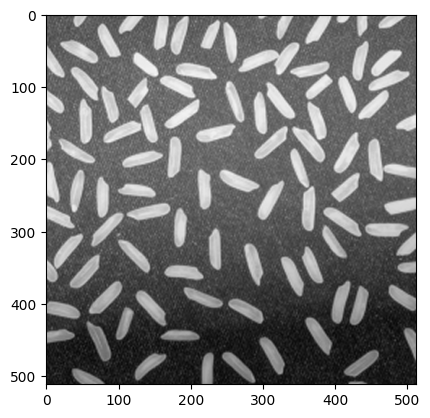

In [12]:
IMAGE_URL = 'https://raw.githubusercontent.com/fquinterov/computer_vision_course/main/resources/images/rice.png'

urllib.request.urlretrieve(IMAGE_URL, 'rice.png')

rice = cv2.imread('rice.png')

img_rice = cv2.cvtColor(rice, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rice, cmap = 'gray')
plt.show()

**TODO: Count how many grains of rice are in the image.** OBVIOUSLY USING REGION LABELS 😀

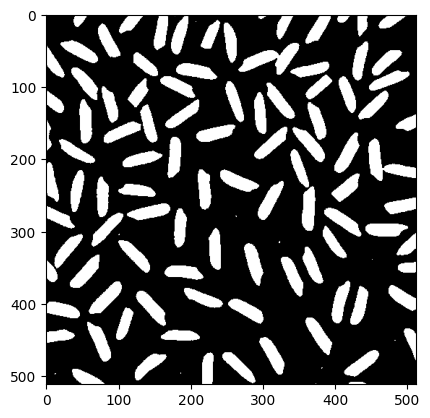

In [13]:
# YOUR CODE GOES HERE
#
#
#
#

# This function will give you an initial binarized image by implementing an adaptive threshold.
output_adapthresh = cv2.adaptiveThreshold (img_rice, 255.0, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)
plt.imshow(output_adapthresh, cmap = 'gray')
plt.show()

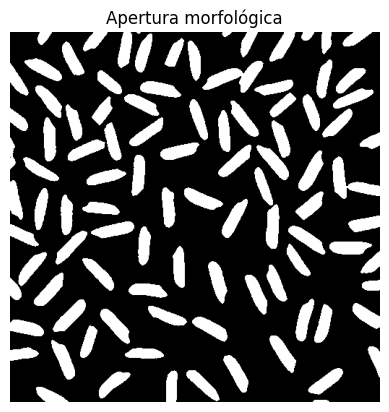

Granos detectados (área ≥ 0.1 px): 99 


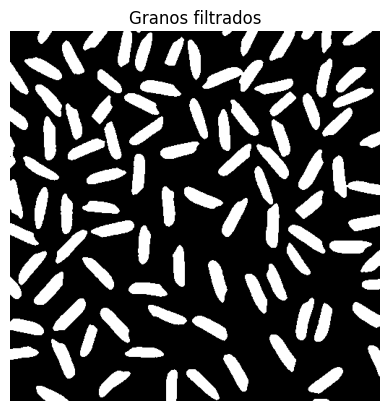

In [40]:
# 1) Apertura morfológica para limpiar ruido fino
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opened = cv2.morphologyEx(output_adapthresh, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opened, cmap='gray')
plt.title('Apertura morfológica')
plt.axis('off')
plt.show()

# 2) Componentes conectados y estadísticas
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opened)

# 3) Filtrado por área mínima (ajusta este valor hasta obtener 101 granos)
area_thresh = 0.1
valid_labels = [i for i in range(1, num_labels)
                if stats[i, cv2.CC_STAT_AREA] >= area_thresh]

# 4) Crear máscara sólo con los granos "válidos"
mask = np.isin(labels, valid_labels).astype('uint8') * 255

# 5) Mostrar conteo y resultado
print(f"Granos detectados (área ≥ {area_thresh} px): {len(valid_labels)} ")
plt.imshow(mask, cmap='gray')
plt.title('Granos filtrados')
plt.axis('off')
plt.show()






## Exercise 2 (filters with Fourier transform)


Upload a picture of the university

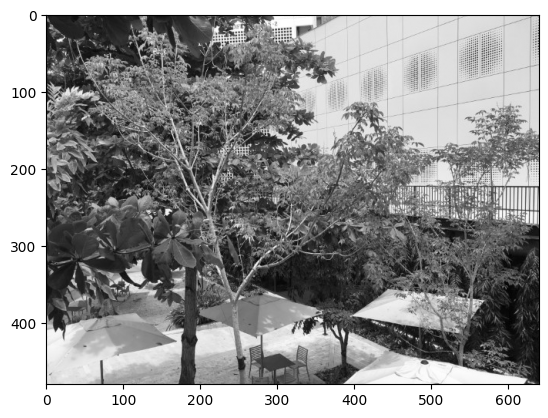

In [42]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/utb-alcatraz.jpg'

urllib.request.urlretrieve(IMAGE_URL, 'utb.png')

utb = cv2.imread('utb.png')

img_utb = cv2.cvtColor(utb, cv2.COLOR_BGR2GRAY)
plt.imshow(img_utb, cmap = 'gray')
plt.show()

**TODO: Compute the Fourier spectrum of the previously loaded image. (hint: use the functions `np.fft.fft2` and `np.fft.fftshift`)**

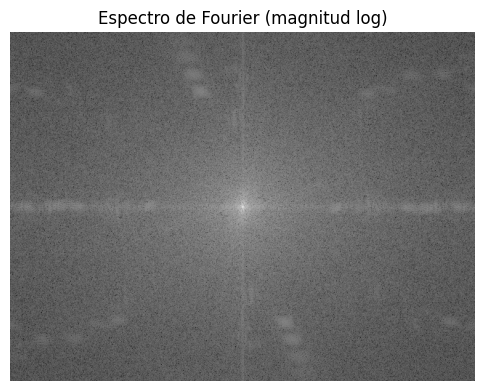

In [43]:
# YOUR CODE GOES HERE

# 1) Calcula la transformada de Fourier 2D y céntrala
f      = np.fft.fft2(img_utb)
fshift = np.fft.fftshift(f)

# 2) Obtén el espectro de magnitud en escala logarítmica
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# 3) Muestra el resultado
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Fourier (magnitud log)')
plt.axis('off')
plt.show()


The following functions allow us to produce a High-pass and Low-pass filter.

In [45]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

Next, we show the Gaussian low pass filter and a Highpass filter.

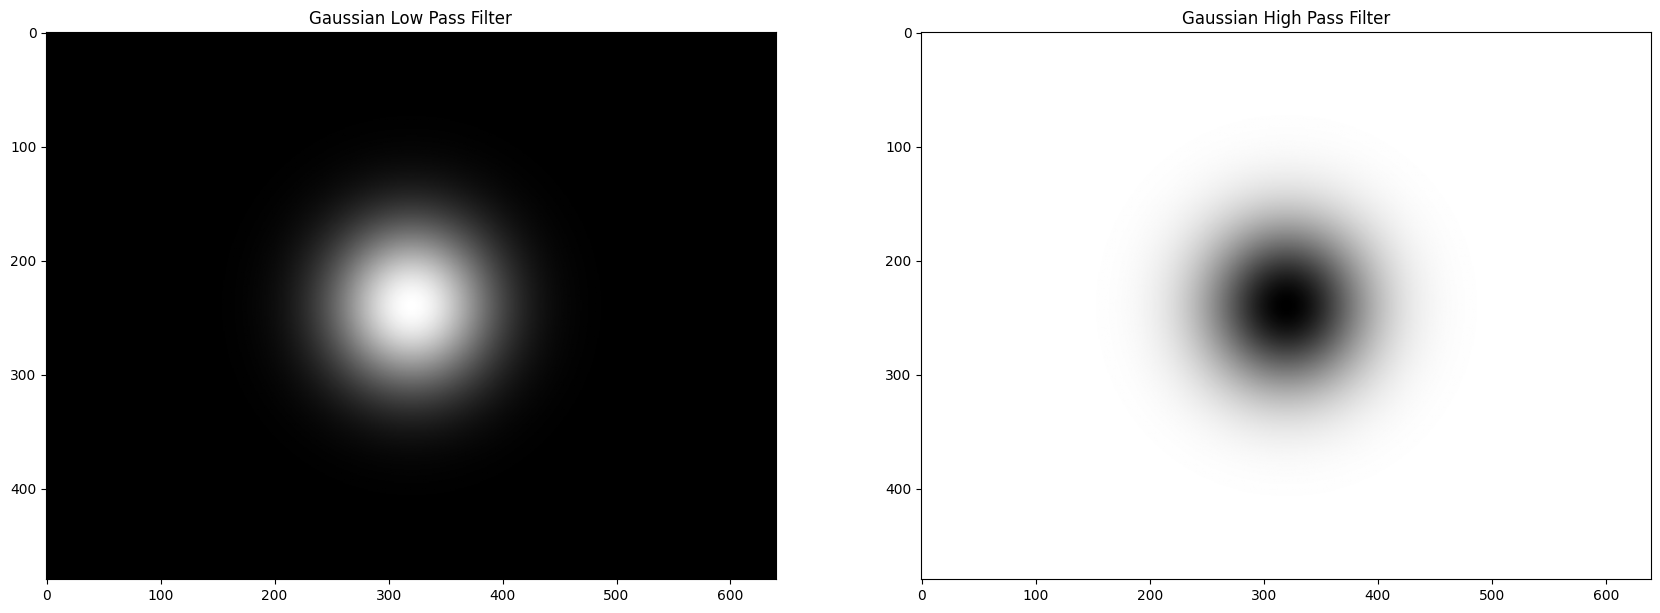

In [46]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img_utb.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img_utb.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

**TODO: Filter the image with the above filters. Remember that filtering in the FFT domain is simple multiplication. # Tip: to get a meaningful image, you have to use `np.fft.ifftshift` after the spectra multiplication.**

**You should already have the FFT of the UTB image from previous TODO**

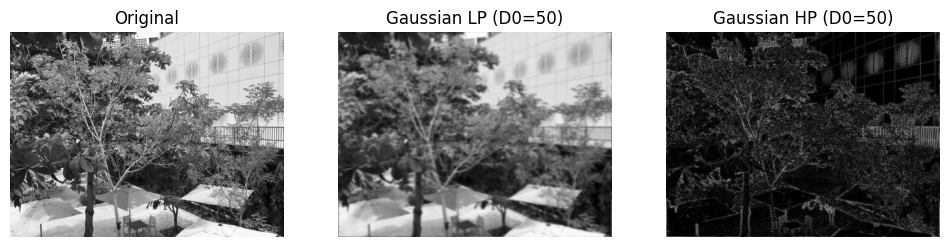

In [47]:
# YOUR CODE GOES HERE
#



# --- Partiendo de mi FFT ya calculada ---
# f      = np.fft.fft2(img_utb)
# fshift = np.fft.fftshift(f)

# 1) Construye los filtros (ya los tenemos gaussianLP y gaussianHP)
D0 = 50
LowPass  = gaussianLP(D0, img_utb.shape)
HighPass = gaussianHP(D0, img_utb.shape)

# 2) Filtrado en el dominio de Fourier (multiplicación)
fshift_lp = fshift * LowPass
fshift_hp = fshift * HighPass

# 3) Desplazamos de vuelta al origen
f_ishift_lp = np.fft.ifftshift(fshift_lp)
f_ishift_hp = np.fft.ifftshift(fshift_hp)

# 4) Reconstrucción en el dominio espacial
img_back_lp = np.fft.ifft2(f_ishift_lp)
img_back_lp = np.abs(img_back_lp)

img_back_hp = np.fft.ifft2(f_ishift_hp)
img_back_hp = np.abs(img_back_hp)

# 5) Visualizamos los resultados
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img_utb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_back_lp, cmap='gray')
plt.title(f'Gaussian LP (D0={D0})')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_back_hp, cmap='gray')
plt.title(f'Gaussian HP (D0={D0})')
plt.axis('off')

plt.show()


In [49]:
# Instalar LaTeX (requerido para la conversión a PDF)
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install pandoc

from google.colab import files

# Convertir el notebook actual a PDF con código y salidas
!jupyter nbconvert --to pdf "/computer_vision_exam_2(1).ipynb"

# Descargar el archivo PDF generado
files.download("/computer_vision_exam_2(1).pdf")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
[NbConvertApp] WARNING | pattern '/computer_vision_exam_2(1).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--

FileNotFoundError: Cannot find file: /computer_vision_exam_2(1).pdf